![banner](../banner.jpg)

***[Workshop 3](about) - Training course in data analysis for genomic surveillance of African malaria vectors***

---

# Module 1 - Plotting with Plotly Express

**Theme: Tools & Technology**

This module provides an introduction to visualising data with some basic charts using the [Plotly Express](https://plotly.com/python/plotly-express/) package for Python. 

## Learning objectives

In this module we will learn how to:

* Prepare data for plotting
* Create scatter plots
* Create bar plots
* Create line plots

## Lecture

### English

In [31]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/7SwVVe8iPl4" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### Français


In [32]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/_Z-bl2i5WdE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Python packages for data visualisation

Being able to visualise your data is obviously a great skill to have, and there are some fantastic Python packages available for creating a wide range of different visualisations. 

In fact, we are spoilt for choice, with packages like:

* [Plotly Express](https://plotly.com/python/plotly-express/)
* [Bokeh](https://docs.bokeh.org/en/latest/)
* [Matplotlib](https://matplotlib.org/)
* [Seaborn](https://seaborn.pydata.org/)
* [HoloViz](https://holoviz.org/) 

...and others all providing some incredibly powerful plotting tools for data scientists.

For this module I've chosen to begin with [Plotly Express](https://plotly.com/python/plotly-express/) because:

* It supports [many different types of chart](https://plotly.com/python/)
* It has a relatively simple interface with good documentation
* You can create plots quickly with just a few lines of code (often just a single function call)
* Plots are interactive

...which makes it relatively easy to learn and a good choice for **exploratory data analysis**.

In this module we are just going to look at some basic charts, but you might like to browse the [Plotly Python](https://plotly.com/python/) website to see what other charts are possible.


## Setup

In this module we'll use the Plotly Express package, and we'll also use pandas for loading data to plot. (See [workshop 2, module 1 for an introduction to pandas DataFrames](https://anopheles-genomic-surveillance.github.io/workshop-2/module-1-pandas.html) if you missed it or need a recap.) Both of these packages are already installed on colab, so we can go ahead and import them.

In [33]:
import pandas as pd
import plotly.express as px

## Preparing data for plotting

Plotly Express can accept data in a [variety of different input formats](https://plotly.com/python/px-arguments/), but it works particularly well when you provide data as a pandas DataFrame.

Let's remind ourselves what a DataFrame looks like, by loading one of the example DataFrames that come with the Plotly Express package.

In [34]:
df_medals_long = px.data.medals_long()
df_medals_long

,nation,medal,count
0,South Korea,gold,24
1,China,gold,10
2,Canada,gold,9
3,South Korea,silver,13
4,China,silver,15
5,Canada,silver,12
6,South Korea,bronze,11
7,China,bronze,8
8,Canada,bronze,12


One thing worth mentioning is that often the same data can be structured in different ways. For example, the same data above could also be stored in the following DataFrame:

In [35]:
df_medals_wide = px.data.medals_wide()
df_medals_wide

,nation,gold,silver,bronze
0,South Korea,24,13,11
1,China,10,15,8
2,Canada,9,12,12


The `df_medals_long` DataFrame is an example of a **"long-form"** DataFrame, so-called because it has more rows and fewer columns.

The `df_medals_wide` DataFrame is an example of a **"wide-form"** DataFrame, so-called because it has fewer rows and more columns.

Plotly Express can plot either, but for the examples we're going to look at today, it is slightly more convenient to work with long-form data.

Let's now load some more interesting data to practise plotting with, which is the [Systema Globalis](https://github.com/open-numbers/ddf--gapminder--systema_globalis) data on income, life expectancy and child mortality by country, used by [Gapminder](https://www.gapminder.org/tools). 

In [36]:
def load_gapminder_data():
    """Create a pandas DataFrame with some of the key indicators from the 
    Open Numbers Systema Globalis dataset."""

    # load income per person
    df_income = pd.read_csv("https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv")

    # load life expectancy
    df_life_expectancy = pd.read_csv("https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--life_expectancy_at_birth_with_projections--by--geo--time.csv")

    # load population size
    df_population = pd.read_csv("https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--population_total--by--geo--time.csv")

    # load child mortality
    df_child_mortality = pd.read_csv("https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--child_mortality_0_5_year_olds_dying_per_1000_born--by--geo--time.csv")

    # load country attributes
    df_countries = pd.read_csv("https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv")

    # rename some columns in the countries dataframe to help with merging
    df_countries = (
        df_countries
        [["country", "name", "world_4region", "world_6region"]]
        .rename(columns={"country": "geo", "name": "country"})
    )

    # capitalise regions
    df_countries["world_4region"] = df_countries["world_4region"].str.capitalize()

    # join all indicators into a single dataframe
    df_gapminder = pd.merge(df_population, df_income, on=["geo", "time"])
    df_gapminder = pd.merge(df_gapminder, df_life_expectancy, on=["geo", "time"])
    df_gapminder = pd.merge(df_gapminder, df_child_mortality, on=["geo", "time"])
    df_gapminder = pd.merge(df_gapminder, df_countries, on="geo")

    # rename some columns to be more concise
    df_gapminder = df_gapminder.rename(
        columns={
            "time": "year",
            "population_total": "population",
            "income_per_person_gdppercapita_ppp_inflation_adjusted": "income_per_person",
            "life_expectancy_at_birth_with_projections": "life_expectancy",
            "child_mortality_0_5_year_olds_dying_per_1000_born": "child_mortality",
        }
    )

    # keep only data between 1950 and 2021 - it's less jumpy
    df_gapminder = df_gapminder.query("1950 <= year <= 2021").reset_index(drop=True)

    # tidy up columns
    df_gapminder.drop(columns=["geo"], inplace=True)
    df_gapminder.insert(0, "country", df_gapminder.pop("country"))  # move country column to the front

    return df_gapminder


In [37]:
df_gapminder = load_gapminder_data()
df_gapminder

,country,year,population,income_per_person,life_expectancy,child_mortality,world_4region,world_6region
0,Afghanistan,1950,7752117,1344,42.72,415.95,Asia,south_asia
1,Afghanistan,1951,7840151,1360,42.92,413.05,Asia,south_asia
2,Afghanistan,1952,7935996,1382,43.14,407.19,Asia,south_asia
3,Afghanistan,1953,8039684,1441,43.45,401.21,Asia,south_asia
4,Afghanistan,1954,8151316,1447,43.34,395.12,Asia,south_asia
...,...,...,...,...,...,...,...,...
14017,Zimbabwe,2017,14236599,3796,59.87,49.31,Africa,sub_saharan_africa
14018,Zimbabwe,2018,14438812,3923,60.64,46.23,Africa,sub_saharan_africa
14019,Zimbabwe,2019,14645473,3630,61.04,44.43,Africa,sub_saharan_africa
14020,Zimbabwe,2020,14862927,3374,60.69,43.06,Africa,sub_saharan_africa


## Scatter plots

Let's use the Systema Globalis data to make a scatter plot. To make a scatter plot, we can use the `px.scatter()` function. Let's look at the function documentation.

In [38]:
px.scatter?

The [px.scatter() function documentation](https://plotly.com/python-api-reference/generated/plotly.express.scatter) is also available on the Plotly website.

For any given type of plot or chart, there is also usually a user guide on the Plotly website, which provides some helpful examples. For example, here is the [Plotly user guide on scatter plots](https://plotly.com/python/line-and-scatter/).

### First scatter plot

In [39]:
fig = px.scatter(
    data_frame=df_gapminder.query("year == 2021"),
    x="income_per_person",
    y="life_expectancy",
)
fig

**Exercise 1 (English)**

Uncomment the code in the cell below and run it to create a scatter plot comparing `income_per_person` with `child_mortality` in 2021.

**Exercice 1 (Français)**

Décommenter le code dans la cellule ci-dessous et l’exécuter afin de créer un diagramme à nuage de points comparant income_per_person avec child_mortality en 2021. 

In [40]:
fig = px.scatter(
    data_frame=df_gapminder.query("year == 2021"),
    x="income_per_person",
    y="child_mortality",
)
fig

### Hover text (a.k.a. tooltips)

To help explore these data, let's use the `hover_name` and `hover_data` parameters to add more information into the hover text.

In [41]:
fig = px.scatter(
    data_frame=df_gapminder.query("year == 2021"),
    x="income_per_person",
    y="life_expectancy",
    hover_name="country",
    hover_data=["child_mortality"],
)
fig

N.B., there is [lots more information on how to use hover text](https://plotly.com/python/hover-text-and-formatting/) in the Plotly docs.

### Interactive controls

Every Plotly plot has a set of interactive controls, which appear at the top right of the plot and look like this:

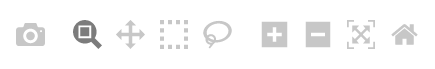

These controls are useful for zooming and panning a plot, as well as for downloading a static version of a plot.

### Marker color

To explore these data further, let's use the `color` parameter to represent another variable.

In [42]:
fig = px.scatter(
    data_frame=df_gapminder.query("year == 2021"),
    x="income_per_person",
    y="life_expectancy",
    hover_name="country",
    hover_data=["child_mortality"],
    color="world_4region",
)
fig

Now we can see easily which region of the world each country belongs to.

### Marker size

Let's use the `size` parameter to also visualise the population size of each country. 

In [43]:
fig = px.scatter(
    data_frame=df_gapminder.query("year == 2021"),
    x="income_per_person",
    y="life_expectancy",
    hover_name="country",
    hover_data=["child_mortality"],
    color="world_4region",
    size="population",
    size_max=80,
)
fig

Note that we also used the `size_max` parameter to increase the allowed maximum size of markers, which is better for this particular data.

**Exercise 2 (English)**

Create a scatter plot using the Gapminder data for the year 1950, with `income_per_person` on the X axis and `child_mortality` on the Y axis. Use `population` for the marker size, and `world_6region` for marker color.

**Exercice 2 (Français)**

Créer un diagramme à nuage de points utilisant les données de Gapminder pour l’année 1950 avec `income_per_person` sur l’axe horizontal X et `child_mortality` sur l’axe vertical Y. Utiliser `population` pour la taille du point et `world6_region` pour sa couleur.

In [44]:
fig = px.scatter(
    data_frame=df_gapminder.query("year == 1950"),
    x="income_per_person",
    y="child_mortality",
    hover_name="country",
    hover_data=["life_expectancy"],
    color="world_6region",
    size="population",
    size_max=80,
)
fig

### Plot title and axis labels

If we're presenting this plot to others, it is a good idea to tidy up the axis titles, and to add a title to the plot. We can do this with the `labels` and `title` parameters.

In [45]:
fig = px.scatter(
    data_frame=df_gapminder.query("year == 2021"),
    x="income_per_person",
    y="life_expectancy",
    hover_name="country",
    hover_data=["child_mortality"],
    color="world_4region",
    size="population",
    size_max=80,
    labels={
        "income_per_person": "Income",
        "life_expectancy": "Life expectancy",
        "child_mortality": "Child mortality",
        "world_4region": "World region",
        "population": "Population",
    },
    title="Life expectancy and income by country in 2021"
)
fig

### Using log scale

Some variables are more naturally visualised on a log scale, rather than a linear scale. Let's use the `log_x` parameter to apply a log scale to the X axis.

In [46]:
fig = px.scatter(
    data_frame=df_gapminder.query("year == 2021"),
    x="income_per_person",
    y="life_expectancy",
    hover_name="country",
    hover_data=["child_mortality"],
    color="world_4region",
    size="population",
    size_max=80,
    labels={
        "income_per_person": "Income",
        "life_expectancy": "Life expectancy",
        "world_4region": "World region",
        "population": "Population",
    },
    title="Life expectancy and income by country in 2021",
    log_x=True,
)
fig

### Animation

Let's now add another variable, which is `year`. When you have a variable that represents time, it can also be useful to visualise this as an animation. We can do this via the `animation_frame` parameter.

In [47]:
fig = px.scatter(
    data_frame=df_gapminder,
    x="income_per_person",
    y="life_expectancy",
    hover_name="country",
    hover_data=["child_mortality"],
    color="world_4region",
    size="population",
    size_max=80,
    labels={
        "income_per_person": "Income",
        "life_expectancy": "Life expectancy",
        "world_4region": "World region",
        "population": "Population",
        "year": "Year",
    },
    title="Life expectancy and income by country, 1950-2021",
    log_x=True,
    animation_frame="year",
    range_x=[200, 200_000],
    range_y=[20, 95],
    height=700,
)
fig

### Visual styling

The scatter plot we've created above is more than good enough if we are doing some exploratory data analysis, but in case you need to make a really strong visual impact and you want to change any aspect of how the plot looks, you can do that via various additional function calls which update the figure. Here's an example, where we alter the template, change the X axis tick positions and labels, and change the marker line color to black.

In [48]:
fig = px.scatter(
    data_frame=df_gapminder,
    x="income_per_person",
    y="life_expectancy",
    hover_name="country",
    hover_data=["child_mortality"],
    color="world_4region",
    size="population",
    size_max=80,
    labels={
        "income_per_person": "Income per person (GDP/capita, PPP$ inflation-adjusted)",
        "life_expectancy": "Life expectancy (years)",
        "world_4region": "World region",
        "population": "Population",
        "year": "Year",
    },
    title="Life expectancy and income by country, 1950-2021",
    log_x=True,
    animation_frame="year",
    range_x=[200, 200_000],
    range_y=[20, 95],
#     color_discrete_sequence=px.colors.qualitative.Set1,
    color_discrete_map={"Asia": "#ff5872", "Africa": "#00d5e9", "Europe": "#ffe700", "Americas": "#7feb00"},
    opacity=0.9,
    template="plotly_white",
    height=600,
    width=800,
)

fig.update_layout(
    xaxis = dict(
        tickmode = "array",
        tickvals = [500, 1_000, 2_000, 4_000, 8_000, 16_000, 32_000, 64_000, 128_000],
        ticktext = ["500", "1000", "2000", "4000", "8000", "16k", "32k", "64k", "128k"]
    )
)

fig.update_xaxes(showline=True, linewidth=1, linecolor="black")
fig.update_yaxes(showline=True, linewidth=1, linecolor="black")

fig.update_traces(
    marker=dict(line=dict(width=.5, color="black")),
)

fig

There's [more info on styling](https://plotly.com/python/styling-plotly-express/) on the Plotly website, as well as info on [continuous color scales](https://plotly.com/python/colorscales/) and [discrete colors](https://plotly.com/python/discrete-color/).

**Exercise 3 (English)**

Create an animated scatter plot from the Gapminder data as above, but using `child_mortality` on the Y axis and `world_6region` for marker color.

Also, use a different palette for the marker colors. Hint: use the `color_discrete_sequence` parameter, and choose your favourite [discrete color sequence](https://plotly.com/python/discrete-color/#color-sequences-in-plotly-express) (palette) from the Plotly website.

**Exercice 3 (Français)**

Créer un diagramme à nuage de points animé utilisant les données de Gapminder comme ci-dessus mais affichant child_mortality sur l’axe Y and world6_region pour la couleur du marqueur.

Utiliser aussi une palette de couleur différente. Indice: utiliser le paramètre `color_discrete_sequence` et choisir votre [palette favorite](https://plotly.com/python/discrete-color/#color-sequences-in-plotly-expres) sur le site Plotly. 

In [49]:
fig = px.scatter(
    data_frame=df_gapminder,
    x="income_per_person",
    y="child_mortality",
    hover_name="country",
    hover_data=["life_expectancy"],
    color="world_6region",
    size="population",
    size_max=80,
    labels={
        "income_per_person": "Income per person (GDP/capita, PPP$ inflation-adjusted)",
        "life_expectancy": "Life expectancy (years)",
        "world_4region": "World region",
        "population": "Population",
        "year": "Year",
    },
    title="Life expectancy and income by country, 1950-2021",
    log_x=True,
    animation_frame="year",
    range_x=[200, 200_000],
    range_y=[20, 500],
#     color_discrete_sequence=px.colors.qualitative.dark24,
    color_discrete_map={"Asia": "#222a2a", "Africa": "#511cfb", "Europe": "#862a1b", "Americas": "#2e91e5"},
    opacity=0.9,
    template="plotly_white",
    height=600,
    width=800,
)

fig.update_layout(
    xaxis = dict(
        tickmode = "array",
        tickvals = [500, 1_000, 2_000, 4_000, 8_000, 16_000, 32_000, 64_000, 128_000],
        ticktext = ["500", "1000", "2000", "4000", "8000", "16k", "32k", "64k", "128k"]
    )
)

fig.update_xaxes(showline=True, linewidth=1, linecolor="black")
fig.update_yaxes(showline=True, linewidth=1, linecolor="black")

fig.update_traces(
    marker=dict(line=dict(width=.5, color="black")),
)

fig

### 3D scatter plots

For a bit of extra interest, let's use the `px.scatter_3d()` function to make a 3-dimensional version of the Gapminder animation, adding in the `child_mortality` variable.

In [50]:
fig = px.scatter_3d(
    data_frame=df_gapminder, 
    x="income_per_person", 
    y="life_expectancy", 
    z="child_mortality",
    hover_name="country",
    color="world_4region",
    size="population",
    size_max=100,
    animation_frame="year",
    log_x=True,
    range_x=[200, 200_000],
    range_y=[0, 95],
    range_z=[0, 500],
    height=700,
    width=700,
)

fig.update_layout(
    scene=dict(aspectmode="cube"),
    legend=dict(itemsizing="constant"),
)

fig

## Bar plots

To illustrate bar plots let's use data from [Alliance for Malaria Prevention's Net Mapping Project](https://allianceformalariaprevention.com/working-groups/net-mapping/). We'll combine data from the [2020 report](https://storage.googleapis.com/vo_agam_release/reference/amp_net_mapping_project/Final-2020.xlsx) and the [2022 Q1 report](https://storage.googleapis.com/vo_agam_release/reference/amp_net_mapping_project/NMP-1st-Q-2022.xlsx), which together provide data on LLIN shipments by country for 2004-2021 broken down by LLIN type (standard, PBO and dual active ingredient). 

In [51]:
def load_llin_data():
    """Load data on LLIN shipments from the Alliance for Malaria Prevention's
    Net Mapping Project."""

    # N.B., data are split over several spreadsheets, so some munging is required.

    # N.B., files have been obtained from the AMP website and uploaded to 
    # Google Cloud Storage for efficient download.

    # load the "Final-2020.xlsx" dataset, "SSA" sheet - this has LLINs for 2004-2020
    df_nmp_2020_ssa = pd.read_excel(
        "https://storage.googleapis.com/vo_agam_release/reference/amp_net_mapping_project/Final-2020.xlsx", 
        sheet_name="SSA",
        skiprows=2,
        skipfooter=2,
        names=["country"] + list(range(2004, 2021)),
        usecols=list(range(18))
    )

    # load the "Final-2020.xlsx" dataset, "SSA by net type" sheet - this has LLINs by type for 2018, 2019, 2020
    df_nmp_2020_ssa_by_type = pd.read_excel(
        "https://storage.googleapis.com/vo_agam_release/reference/amp_net_mapping_project/Final-2020.xlsx", 
        sheet_name="SSA by net type",
        skiprows=3,
        skipfooter=8,
        usecols="A,B,C,F,G,H,K,L,M",
        names=[
            "country",
            "2018_standard",
            "2018_pbo",
            "2019_standard",
            "2019_pbo",
            "2019_dual",
            "2020_standard",
            "2020_pbo",
            "2020_dual",
        ],
    )

    # load the "NMP-1st-Q-2022.xlsx" dataset, "SSA by Type" sheet - this has LLINs by type for 2019, 2020, 2021
    df_nmp_2022q1_ssa_by_type = pd.read_excel(
        "https://storage.googleapis.com/vo_agam_release/reference/amp_net_mapping_project/NMP-1st-Q-2022.xlsx",
        sheet_name="SSA by Type",
        skiprows=3,
        skipfooter=2,
        usecols="A,C,D,E,H,I,J,M,N,O",
        names=[
            "country",
            "2019_standard",
            "2019_pbo",
            "2019_dual",
            "2020_standard",
            "2020_pbo",
            "2020_dual",
            "2021_standard",
            "2021_pbo",
            "2021_dual",
        ],
    )

    # N.B., we would like LLINs by type for the full range 2004-2021.
    # We also would like the data in "long form" for easier plotting.
    # Let's munge!

    # start with data prior to 2018
    df_llins_pre_2018 = (
        df_nmp_2020_ssa
        .melt(id_vars="country", var_name="year", value_name="llins_shipped")
        .query("year < 2018")
    )
    df_llins_pre_2018["llin_type"] = "standard"  # assume all standard llins prior to 2018

    # now grab the data by type for 2018
    df_llins_2018 = (
        df_nmp_2020_ssa_by_type
        [["country", "2018_standard", "2018_pbo"]]
        .melt(id_vars="country", var_name="year_type", value_name="llins_shipped")
    )
    df_year_type = (
        df_llins_2018["year_type"]
        .str.split("_", expand=True)
        .rename(columns={0: "year", 1: "llin_type"})
    )
    df_llins_2018["year"] = df_year_type["year"]
    df_llins_2018["llin_type"] = df_year_type["llin_type"]
    df_llins_2018.drop(columns="year_type", inplace=True)

    # now grab the data by type for 2019, 2020, 2021
    df_llins_post_2018 = (
        df_nmp_2022q1_ssa_by_type
        [["country", "2019_standard", "2019_pbo", "2019_dual", "2020_standard", "2020_pbo", "2020_dual", "2021_standard", "2021_pbo", "2021_dual"]]
        .melt(id_vars="country", var_name="year_type", value_name="llins_shipped")
    )
    df_year_type = (
        df_llins_post_2018["year_type"]
        .str.split("_", expand=True)
        .rename(columns={0: "year", 1: "llin_type"})
    )
    df_llins_post_2018["year"] = df_year_type["year"]
    df_llins_post_2018["llin_type"] = df_year_type["llin_type"]
    df_llins_post_2018.drop(columns="year_type", inplace=True)

    # finally, concatenate everything
    df_llins = pd.concat([df_llins_pre_2018, df_llins_2018, df_llins_post_2018]).reset_index(drop=True)

    # ensure years have the right dtype
    df_llins["year"] = df_llins["year"].astype(int)

    # normalise country names
    df_llins["country"].replace("Congo (Democratic Republic of the)", "DR Congo", inplace=True)

    return df_llins


In [52]:
df_llins = load_llin_data()
df_llins

,country,year,llins_shipped,llin_type
0,Angola,2004,154010,standard
1,Benin,2004,26500,standard
2,Botswana,2004,0,standard
3,Burkina Faso,2004,216500,standard
4,Burundi,2004,160250,standard
...,...,...,...,...
1154,Togo,2021,0,dual
1155,Uganda,2021,0,dual
1156,Zambia,2021,0,dual
1157,Zanzibar,2021,0,dual


In [53]:
df_llins.query("country == 'Nigeria'")

,country,year,llins_shipped,llin_type
30,Nigeria,2004,71400,standard
76,Nigeria,2005,262000,standard
122,Nigeria,2006,2147404,standard
168,Nigeria,2007,2724304,standard
214,Nigeria,2008,15310222,standard
260,Nigeria,2009,19813977,standard
306,Nigeria,2010,29908286,standard
352,Nigeria,2011,2555096,standard
398,Nigeria,2012,5452563,standard
444,Nigeria,2013,26355032,standard


### First bar plot

To make a bar plot, we can use the `px.bar()` function. Let's look at the function documentation.

In [54]:
px.bar?

Again the [px.bar() function docs](https://plotly.com/python-api-reference/generated/plotly.express.bar) are also on the Plotly website, and there is also a [guide to bar charts](https://plotly.com/python/bar-charts/).

Let's now make a bar plot, with `year` on the X axis and `llins_shipped` on the Y axis.

In [55]:
fig = px.bar(
    data_frame=df_llins, 
    x="year", 
    y="llins_shipped"
)
fig

### Improved bar plot

Let's now improve the bar plot by using color, hover text, and doing some visual styling.

In [56]:
fig = px.bar(
    data_frame=df_llins, 
    x="year", 
    y="llins_shipped", 
    color="llin_type", 
    hover_name="country",
    labels={
        "year": "Year",
        "llins_shipped": "No. LLINs",
        "llin_type": "LLIN type"
    },
    title="LLIN shipments to countries in Sub-Saharan Africa",
    width=800,
    template="plotly_white",
)
fig

**Exercise 4 (English)**

Make a bar chart from the LLIN data as above, but using `country` for the X axis and `year` for the hover name.

**Exercice 4 (Français)**

Créer un diagramme à barres pour les données sur les LLINs comme au-dessus mais en utilisant `country` pour l’axe X et `year` pour le texte de survol.

In [57]:
fig = px.bar(
    data_frame=df_llins, 
    x="country", 
    y="llins_shipped", 
    color="llin_type", 
    hover_name="country",
    labels={
        "country": "Country",
        "llins_shipped": "No. LLINs",
        "llin_type": "LLIN type"
    },
    title="LLIN shipments to countries in Sub-Saharan Africa",
    width=800,
    template="plotly_white",
)
fig

## Line and area plots

Let's also use the LLIN data to make some line and area plots, via the `px.line()` and `px.area()` functions.

Here is a line plot of LLINs shipped to Nigeria.

In [58]:
fig = px.line(
    data_frame=df_llins.query("country == 'Nigeria'"),
    x="year",
    y="llins_shipped",
    color="llin_type",
    markers=True,
    width=800,
    title="LLIN shipments to Nigeria",
    labels={
        "year": "Year",
        "llins_shipped": "No. LLINs",
        "llin_type": "LLIN type"
    },
    template="plotly_white",
)
fig

**Exercise 5 (English)**

Make a line plot as above but for Democratic Republic of the Congo. Hint: use the query `"country == 'DR Congo'"`

**Exercice 5 (Français)**

Créer un diagramme à lignes comme ci-dessus mais pour la République Démocratique du Congo. Indice: Utiliser la requête `"country == 'DR Congo'"`

In [59]:
fig = px.line(
    data_frame=df_llins.query("country == 'DR Congo'"),
    x="year",
    y="llins_shipped",
    color="llin_type",
    markers=True,
    width=800,
    title="LLIN shipments to Nigeria",
    labels={
        "year": "Year",
        "llins_shipped": "No. LLINs",
        "llin_type": "LLIN type"
    },
    template="plotly_white",
)
fig

**Exercise 6 (English)**

Make an area plot using the LLIN data from Nigeria. Hint: it's exactly the same parameters as the line plot, just call the `px.area()` function instead of `px.line()`.

**Exercice 6 (Français)**

Créer un diagramme à zones utilisant les données des LLINs du Nigeria. Indice: Les paramètres sont les mêmes que pour le diagramme à lignes mais il faut appeler la fonction `px.area()` au lieu de `px.line()`.

In [60]:
fig = px.area(
    data_frame=df_llins.query("country == 'Nigeria'"),
    x="year",
    y="llins_shipped",
    color="llin_type",
    markers=True,
    width=800,
    title="LLIN shipments to Nigeria",
    labels={
        "year": "Year",
        "llins_shipped": "No. LLINs",
        "llin_type": "LLIN type"
    },
    template="plotly_white",
)
fig

## Well done!

Hopefully this has been a useful introduction to plotting in Python.

As I mentioned earlier, there are lots more plot types that Plotly Express provides, take a look at the [user guide](https://plotly.com/python/plotly-express/) and the [API docs](https://plotly.com/python-api-reference/plotly.express.html) for more information.

Happy plotting!

## Exercises

### English

Open this notebook in Google Colab and run it for yourself from top to bottom. As you run through the notebook, cell by cell, think about what each cell is doing, and try the practical exercises along the way.

Have go at the practical exercises, but please don’t worry if you don’t have time to do them all during the practical session, and please ask the teaching assistants for help if you are stuck.

Hint: To open the notebook in Google Colab, click the rocket icon at the top of the page, then select “Colab” from the drop-down menu.

### Français

Ouvrir ce notebook dans Google Colab et l’exécuter vous-même du début à la fin. Pendant que vous exécutez le notebook, cellule par cellule, pensez à ce que chaque cellule fait et essayez de faire les exercices quand vous les rencontrez.

Essayez de faire les exercices mais ne vous inquiétez pas si vous n’avez pas le temps de tout faire pendant la séance appliquée et n’hésitez pas à demander aux enseignants assistants si vous avez besoin d’aide parce que vous êtes bloqués.

Indice: Pour ouvrir le notebook dans Google Colab, cliquer sur l’icône de fusée au sommet de cette page puis choisissez “Colab” dans le menu déroulant.
